# Fordgobike Trip Project
## by (Patrick Gitau)

## Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.This data set is taken from https://www.fordgobike.com/system-data and represents trips taken by members of the service for month of February of 2019.The info about trips taken by service's members, their types, their age, their gender, stations of starting and ending trips, duration of trips.
## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import requests

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
fordgobike= pd.read_csv(r"C:\Users\pgita\Desktop\JUPYTER CLASS\Udacity class\Project\Visualization project\Fordgobike project\First submittion\201902-fordgobike-tripdata.csv")
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
print(fordgobike.shape)
print(fordgobike.dtypes)
print(fordgobike.describe())
print(fordgobike.info())

(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object
        duration_sec  start_station_id  start_station_latitude  \
count  183412.000000     183215.000000           183412.000000   
mean      726.078435        138.590427               37.771223   
std      1794.389780        111.778864                0.099581   
min        61.000000          3.000000               37.317298   
25%       325.000000         47.000000               37.770083   
50%       514.000

In [4]:
# Make copies of original pieces of data
fordgobike_clean = fordgobike.copy()

> Drop some of the column that are not to be used; start_time, end_time, start_station_id, start_station_name, end_station_name, end_station_id, start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude and bike_id.

In [5]:
# removing some of the columns
columns_to_drop = ['start_time', 'end_time','end_station_name', 'start_station_id', 'start_station_name','end_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude','bike_id']
fordgobike_clean.drop(labels=columns_to_drop, axis="columns", inplace=True)
fordgobike_clean.sample(5)

,duration_sec,user_type,member_birth_year,member_gender,bike_share_for_all_trip
114163,108,Subscriber,1997.0,Female,Yes
3200,301,Subscriber,1977.0,Male,No
124343,803,Subscriber,1986.0,Female,No
105434,546,Subscriber,1980.0,Male,No
132102,560,Subscriber,1995.0,Female,Yes


In [6]:
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   user_type                183412 non-null  object 
 2   member_birth_year        175147 non-null  float64
 3   member_gender            175147 non-null  object 
 4   bike_share_for_all_trip  183412 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 7.0+ MB


 > Changed the member_birth year to the age of the member using 2019 as the current year subtracted by member_birth_year

In [7]:
# Subtracting 2019 with member_birth_year to get age of the member
fordgobike_clean['member_age'] = 2019-fordgobike_clean['member_birth_year']
fordgobike_clean.sample(5)

,duration_sec,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
30385,758,Subscriber,1991.0,Female,No,28.0
31470,2206,Subscriber,1988.0,Male,No,31.0
141275,163,Subscriber,1989.0,Male,No,30.0
125629,529,Subscriber,1992.0,Male,No,27.0
124444,440,Subscriber,1977.0,Male,No,42.0


> Some of the bikers don't have the observation for the member_birth_year and member_gender thus drop the missing data.

In [8]:
# Getting member_gender and member_birth_year with missing data
print(fordgobike_clean['member_birth_year'].isnull().value_counts())
print(fordgobike_clean['member_gender'].isnull().value_counts())

False    175147
True       8265
Name: member_birth_year, dtype: int64
False    175147
True       8265
Name: member_gender, dtype: int64


In [9]:
# Dropping the missing values
fordgobike_clean.dropna(inplace=True)
fordgobike_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175147 entries, 0 to 183411
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             175147 non-null  int64  
 1   user_type                175147 non-null  object 
 2   member_birth_year        175147 non-null  float64
 3   member_gender            175147 non-null  object 
 4   bike_share_for_all_trip  175147 non-null  object 
 5   member_age               175147 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.4+ MB


In [10]:
# changing the age data type from float to int.
fordgobike_clean['member_age']=fordgobike_clean['member_age'].astype(int)
fordgobike_clean['member_age'].dtype

dtype('int32')

> Work with a duration range of 61 to 4,000

In [11]:
rows_to_drop=fordgobike_clean.query('duration_sec > 4000').index
fordgobike_clean.drop(labels=rows_to_drop, axis="rows", inplace=True)
fordgobike_clean.shape

(173947, 6)

### What is the structure of your dataset?
There are 183,412 biker in the dataset with  16 columns. 8,265 observation are dropped due to missing member_birth_year and member_gender. Also, 11 columns are drop that won't be used in the visualization. For this date analysis, we are only going to deal with duration time of 61 to 4,000 thus, leaving the data to consist of 173,947 bikers and 6 variables. Rows having a duration time greater than 4,000 were dropped as they are outliers to the dataset. The data coinsist of both numerical and categorical data;<br>
Categorical<br>
    > Nominal data type: user_type, member_birth_year, member_gender and bike_share_for_all_trip <br>
Numeric<br>
    > Interval data: duration_sec, start_station_latitude, start_station_longitude,	end_station_latitude, start_station_id, end_station_id, bike_id, member_birth_year and	end_station_longitude.<br>
Discrete: start_station_id, end_station_id, bike_id, member_birth_year<br>
Continuous: duration_sec, start_station_latitude, start_station_longitude and end_station_latitude
### Main feature(s) of interest 
I'm most interested in figuring out what features have a relationship to the period the trip takes.

### Features in the dataset that will support the investigation
I expect that duration will have a relationship with the member_gender, user_type, member_birth_year and bike_share_for_all_trip.

### 1.The distribution for the main variable: duration

In [12]:
fordgobike_clean['duration_sec'].describe()

count    173947.000000
mean        622.143768
std         455.898777
min          61.000000
25%         322.000000
50%         508.000000
75%         781.000000
max        3999.000000
Name: duration_sec, dtype: float64

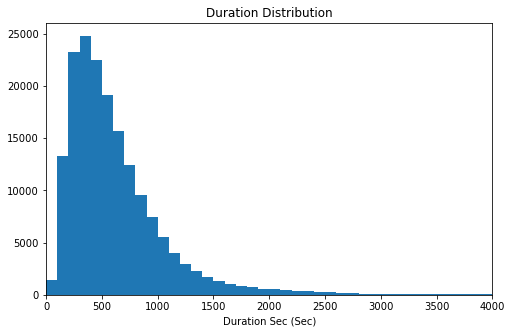

In [13]:
# start with a standard-scaled plot
def standard_scaled_plot (size,variable):
    binsize = size
    bins = np.arange(0, fordgobike_clean[variable].max()+binsize, binsize)
    plt.figure(figsize=[8, 5])
    plt.hist(data = fordgobike_clean, x = variable, bins = bins)
# plotting
standard_scaled_plot (100, "duration_sec")
plt.xlim([0,4000])
plt.xlabel('Duration Sec (Sec)')
plt.title('Duration Distribution')
plt.show()

**A long tail in the distribution**

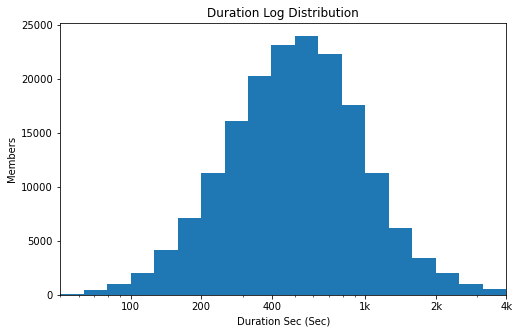

In [14]:
# there's a long tail in the distribution, so let's put it on a log scale instead
def log_scale_plot (logsize, variable):
    log_binsize = logsize
    bins = 10 ** np.arange(1, np.log10(fordgobike_clean[variable].max())+log_binsize, log_binsize)
    plt.figure(figsize=[8, 5])
    plt.hist(data = fordgobike_clean, x = variable, bins = bins)
    plt.xscale('log')

# Plotting
log_scale_plot(0.1,'duration_sec')
plt.xlim([50,4000])
plt.xticks([100, 200, 400, 1e3, 2e3, 4e3], [100, 200, 400, '1k', '2k', '4k'])
plt.xlabel('Duration Sec (Sec)')
plt.ylabel('Members')
plt.title('Duration Log Distribution')
plt.show()

**log-scale have the duration distribution as unimodal**

Duration has a long-tailed distribution, with a lot of bikers on taking on the low duration end and few on the high duration end
<br> 
When plotted on a log-scale, the duration distribution is bimodal, with the highest peak between 400 and 800.

### 2. The distribution for the second numeric variable: Member age

In [15]:
fordgobike_clean['member_age'].describe()

count    173947.000000
mean         34.188862
std          10.115142
min          18.000000
25%          27.000000
50%          32.000000
75%          39.000000
max         141.000000
Name: member_age, dtype: float64

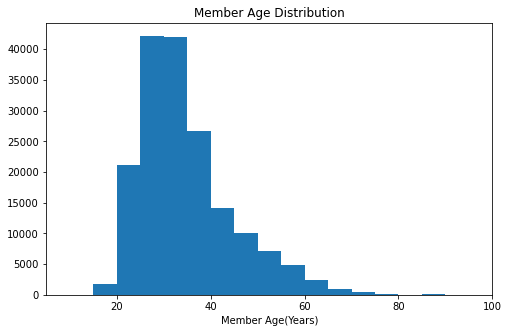

In [16]:
# plotting
standard_scaled_plot (5,"member_age")
plt.xlim([5,100])
plt.xlabel('Member Age(Years)')
plt.title('Member Age Distribution')
plt.show()

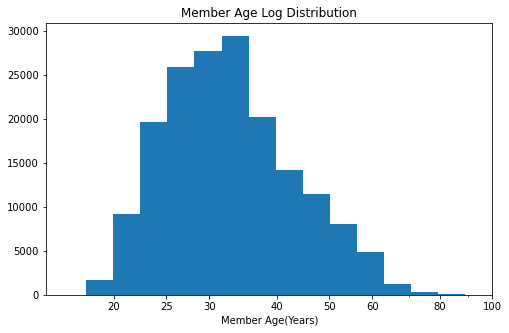

In [17]:
# Plotting
log_scale_plot(.05,'member_age')
plt.xlim([15,100])
plt.xticks([20,25,30,40, 50,60, 80, 100],[20, 25, 30,40, 50,60, 80, 100])
plt.xlabel('Member Age(Years)')
plt.title('Member Age Log Distribution')
plt.show()

**Most of the members are between the age of 20 and 40 years.**<br>
With the age variable showing a long tail in the distribution and the log-scale duration distribution is bimodal, with the highest peak between 20 and 40.

**Grouping of the ages to certain levels; Old,Adult, Teen**

In [18]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [17.0, 35.0, 60.0, 141.0]

# Labels for the four Age groups level
bin_names = ['Teen', 'Adult', 'Old']

# Creates Ages groups level column
fordgobike_clean['member_age_groups'] = pd.cut(fordgobike_clean['member_age'], bin_edges, labels=bin_names, right=True)

# Checks for successful creation of this column
fordgobike_clean.sample(5)


,duration_sec,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,member_age_groups
166615,365,Subscriber,1968.0,Male,No,51,Adult
87066,263,Subscriber,1988.0,Male,Yes,31,Teen
168185,333,Subscriber,1978.0,Male,No,41,Adult
172382,1274,Customer,1985.0,Female,No,34,Teen
86656,866,Subscriber,1972.0,Male,No,47,Adult


**What are the proportions of the customers and subscribers members?**

,user_type
Subscriber,157928
Customer,16019


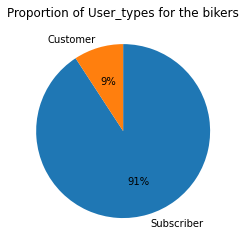

In [19]:
#Creating a formula for pie plotting
def pie_plot(x):
    pie=plt.pie(x,labels = x.index, startangle = 90, counterclock = False, autopct= '%1.0f%%');
    rtf=pd.DataFrame(x)
    return pie, rtf
#plotting
user_type_counts = fordgobike_clean['user_type'].value_counts()
plt.title('Proportion of User_types for the bikers')
pie, rtf = pie_plot(user_type_counts)
rtf 

> Most of the bikers in the dataset are subscribers (91%) while only 9% are customer

**Getting an idea of all ordinal variable**

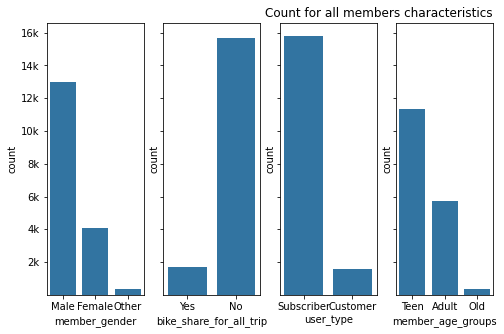

In [20]:
# let's plot all categorical variable to get an idea of each ordinal variable's distribution.
fig, ax = plt.subplots(ncols=4, sharey='all', figsize = [8,5])
plt.yticks([2e4, 4e4, 6e4, 8e4, 1e5, 12e4, 14e4, 16e4], ['2k', '4k', '6k', '8k', '10k', '12k', '14k', '16k'])
label = 'Count for all members characteristics'
plt.title(label, loc='right')

default_color = sb.color_palette()[0]
sb.countplot(data = fordgobike_clean, x = 'member_gender', color = default_color, ax = ax[0])
sb.countplot(data = fordgobike_clean, x = 'bike_share_for_all_trip', color = default_color, ax = ax[1])
sb.countplot(data = fordgobike_clean, x = 'user_type', color = default_color, ax = ax[2])
sb.countplot(data = fordgobike_clean, x = 'member_age_groups', color = default_color, ax = ax[3])
plt.show()

> The bikers are mostly composed of males who are approximately triple the number of females.<br>
> There was no much bike share through the trip.<br>
> Teen are the greatest in number followed by adults and lastly old

**Number count for the age group**

,member_age_groups
Teen,113435
Adult,57005
Old,3507


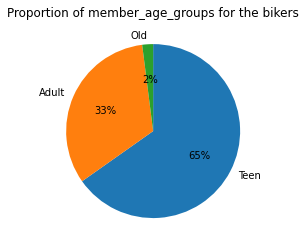

In [21]:
#plotting
member_age_groups_counts = fordgobike_clean['member_age_groups'].value_counts()
plt.title('Proportion of member_age_groups for the bikers')
pie, rtf = pie_plot(member_age_groups_counts)
rtf 

> Most of the members are teen followed by adults and the old make up the least number of members

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
>  Duration has a long-tailed distribution, with a lot of bikers on taking on the low duration end and few on the high duration end
<br> 
When plotted on a log-scale, the duration distribution is bimodal, with the highest peak between 400 and 800.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> For the member Age, a limit was set to omit those member with an age of 100 and above<br>
Also, instead of using member_birth_year I preferred to use the member age which was easier to analysis and visualize.

## Bivariate Exploration

### Relationship of the duration and the age of the members

**Overall view of data**

fordgobike_clean.shape= (173947, 7)
fordgobike_clean_samp.shape= (4000, 7)


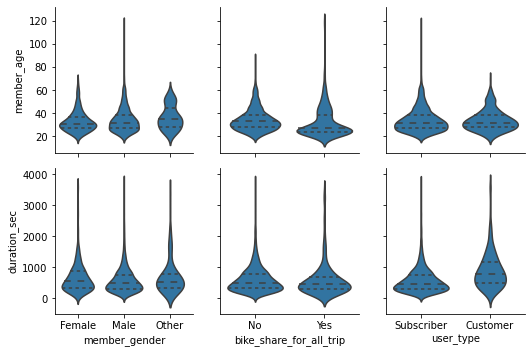

In [22]:
# plot matrix: sample 4000 so that plots are clearer and they render faster
print("fordgobike_clean.shape=",fordgobike_clean.shape)
fordgobike_clean_samp = fordgobike_clean.sample(n=4000, replace = False)
print("fordgobike_clean_samp.shape=",fordgobike_clean_samp.shape)
base_color = sb.color_palette()[0]

g = sb.PairGrid(data = fordgobike_clean_samp, x_vars = ['member_gender', 'bike_share_for_all_trip', 'user_type'],
                y_vars = ['member_age', 'duration_sec'])
g.map(sb.violinplot, color=base_color, inner='quartile')


> Most of the members are between 25 to 50 years of age and the duration time is mostly on the 500 to 1000.

**What is the relationship between duration time and age**

Text(0.5, 0, 'Member Age(years)')

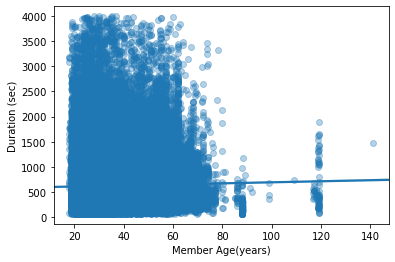

In [23]:
# plotting a regplot to visualize the relation of age and duration
sb.regplot(data = fordgobike_clean, x = 'member_age', y = 'duration_sec', truncate=False, x_jitter=0.2, scatter_kws={'alpha':1/3});
plt.ylabel('Duration (sec)')
plt.xlabel('Member Age(years)')

>Most of the members have a short period duration time with few having a long duration time. Those with high duration time can be termed as Young population.

**An overview of all the counts in the dataset**

In [24]:
# Getting all the counts in the data
for data in fordgobike_clean[['user_type','member_gender','bike_share_for_all_trip','member_age_groups']]:
    print(fordgobike_clean[data].value_counts())

Subscriber    157928
Customer       16019
Name: user_type, dtype: int64
Male      129844
Female     40513
Other       3590
Name: member_gender, dtype: int64
No     156710
Yes     17237
Name: bike_share_for_all_trip, dtype: int64
Teen     113435
Adult     57005
Old        3507
Name: member_age_groups, dtype: int64


**Relationship between Age groups and duration time (Sec)**

,duration_sec
member_age_groups,
Teen,113435
Adult,57005
Old,3507


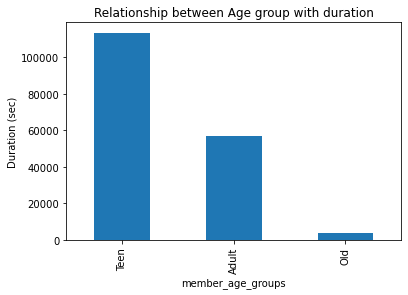

In [25]:
#Creating bar plot formula
def bar_plot(data):
    bar=data.plot(kind="bar",sort_columns=True)
    rtf=pd.DataFrame(data)
    return bar, rtf
# visualizing the relation of different age groups with duration time
plt.title('Relationship between Age group with duration')
plt.ylabel('Duration (sec)')
data = fordgobike_clean.groupby('member_age_groups')['duration_sec'].count()
bar, rtf =bar_plot(data);
rtf

> As expected, teen age members take more duration time as compared to the old and adults. The old take the lowest duration time but also there are few old members in the data.

**Relation of age groups with the duration**

<AxesSubplot:xlabel='duration_sec', ylabel='member_age_groups'>

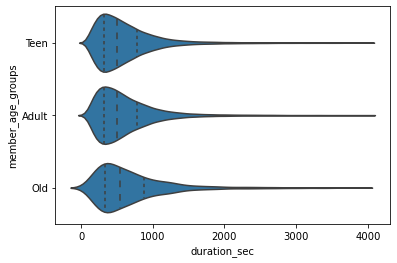

In [26]:
base_color = sb.color_palette()[0]
sb.violinplot(data = fordgobike_clean, y ='member_age_groups', x = 'duration_sec', color=base_color, inner='quartile')

> For the distribution of the duration in terms of the age groups show that majority of the population didn't have a high duration time.

**Is there any relation of the member that share bike in accordance to the age of the member?**

bike_share_for_all_trip
member_age_groups bike_share_for_all_trip                         
Teen              No                                        101364
                  Yes                                        12071
Adult             No                                         52484
                  Yes                                         4521
Old               No                                          2862
                  Yes                                          645

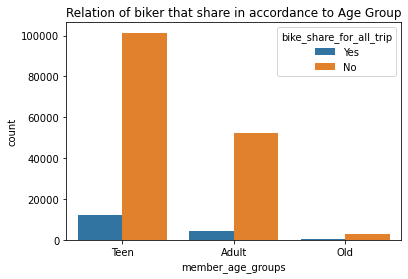

In [27]:
# Creating a count plot formula
def count_plot(variable):
    countplot=sb.countplot(data = fordgobike_clean, x = 'member_age_groups', hue=variable)
    rtf=pd.DataFrame(fordgobike_clean.groupby('member_age_groups')[variable].value_counts())
    return countplot, rtf
# visualizing
plt.title('Relation of biker that share in accordance to Age Group' )
countplot, rtf =count_plot('bike_share_for_all_trip')
rtf

> Teen age member don't share the bike the most followed by adult then the old but this is not in accordance to the proportion of their number as the teen and adult makes up most of the data thus their total number can be used as a reference of those member that share the bike all trip.

**Proportion relation of the member who shared bike in accordance to the age groups**

In [28]:
# converegion of bike_share_for_all_trip object into int
fordgobike_clean['bike_share'] = (fordgobike_clean['bike_share_for_all_trip']=='Yes').astype(int) 
fordgobike_clean.head()

,duration_sec,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,member_age_groups,bike_share
4,1585,Subscriber,1974.0,Male,Yes,45,Adult,1
5,1793,Subscriber,1959.0,Male,No,60,Adult,0
6,1147,Subscriber,1983.0,Female,No,36,Adult,0
7,1615,Subscriber,1989.0,Male,No,30,Teen,0
8,1570,Subscriber,1988.0,Other,No,31,Teen,0


In [29]:
#creating a numeric observation for the member in term of bike sharing
No_share=fordgobike_clean.query('bike_share == 0')
share=fordgobike_clean.query('bike_share == 1')

,member_age_groups
Teen,0.106413
Adult,0.079309
Old,0.183918


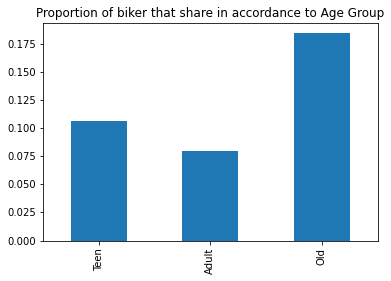

In [30]:
#Getting the relation of bike sharing with the age groups in accordance to the total number of age group
share_proportion=(share['member_age_groups'].value_counts()/fordgobike_clean['member_age_groups'].value_counts())
plt.title('Proportion of biker that share in accordance to Age Group' )
share_proportion.sort_values()
bar, rtf =bar_plot(share_proportion);
rtf

> Inspite of the teen age bikers being many, according to the proportion of the total number, most of the old age members share the bike during the trip followed by the teen and lastly the adult members

**What about the member who don't share their bike for the trip**

,member_age_groups
Teen,0.893587
Adult,0.920691
Old,0.816082


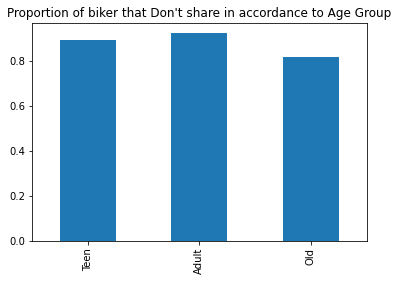

In [31]:
share_proportion=(No_share['member_age_groups'].value_counts()/fordgobike_clean['member_age_groups'].value_counts())
plt.title("Proportion of biker that Don't share in accordance to Age Group" )
share_proportion.sort_values()
bar, rtf =bar_plot(share_proportion);
rtf

> Inaccordance to the proportion of the total number, Most of adults don't share the biker for the trip followed by teen, while the old share don't share the bike the least as expected.

**Is there any relation of the member user type in accordance to the age of the member?**

user_type
member_age_groups user_type            
Teen              Subscriber     102669
                  Customer        10766
Adult             Subscriber      51935
                  Customer         5070
Old               Subscriber       3324
                  Customer          183

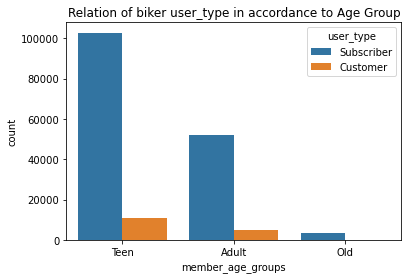

In [32]:
# visualizing
plt.title('Relation of biker user_type in accordance to Age Group' )
countplot, rtf = count_plot('user_type')
rtf

> Most of all the age groups are subscribers while a few are customer,with teen having the highest number of customers and subscribers followed by adult and the old lastly.

**Converting the user type to numeric variable**

In [33]:
# converting of user_type object into int
fordgobike_clean['type'] = (fordgobike_clean['user_type']=='Subscriber').astype(int) 
fordgobike_clean.head(5)

,duration_sec,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,member_age_groups,bike_share,type
4,1585,Subscriber,1974.0,Male,Yes,45,Adult,1,1
5,1793,Subscriber,1959.0,Male,No,60,Adult,0,1
6,1147,Subscriber,1983.0,Female,No,36,Adult,0,1
7,1615,Subscriber,1989.0,Male,No,30,Teen,0,1
8,1570,Subscriber,1988.0,Other,No,31,Teen,0,1


In [34]:
customer=fordgobike_clean.query('type == 0')
subscriber=fordgobike_clean.query('type == 1')

**Subscriber who share bike**

157928


,bike_share_for_all_trip
No,140691
Yes,17237


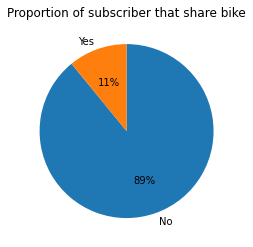

In [35]:
#Visualization of subscribers user_type share bike for trip
print(fordgobike_clean['user_type'].value_counts().Subscriber)
proportion_subscriber=subscriber['bike_share_for_all_trip'].value_counts()
plt.title('Proportion of subscriber that share bike')
pie, rtf = pie_plot(proportion_subscriber)
rtf 

> Out of the 157,928 customer, 11% share bike while 89% don't share bike

**Customer who share bike**

Subscriber    157928
Customer       16019
Name: user_type, dtype: int64


,bike_share_for_all_trip
No,16019


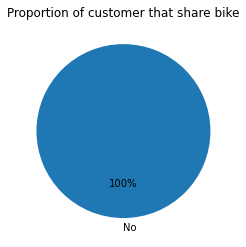

In [36]:
print(fordgobike_clean['user_type'].value_counts())
proportion_customer=customer['bike_share_for_all_trip'].value_counts()
plt.title('Proportion of customer that share bike')
pie, rtf = pie_plot(proportion_customer)
rtf 

> 100% of the customer don't share the bike for all trip

**Division of customers and subscribers in accordance to member gender**

157928


,member_gender
Male,118715
Female,36066
Other,3147


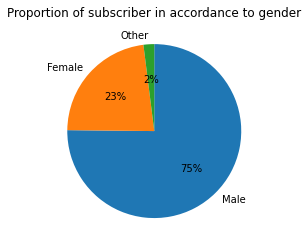

In [37]:
# Relation of subscriber and gender
print(fordgobike_clean['user_type'].value_counts().Subscriber)
subscriber_gender=subscriber['member_gender'].value_counts()
plt.title('Proportion of subscriber in accordance to gender')
pie, rtf = pie_plot(subscriber_gender)
rtf 

> The male gender dominate for the subscribers followed by female while the others make the least percent

16019


,member_gender
Male,11129
Female,4447
Other,443


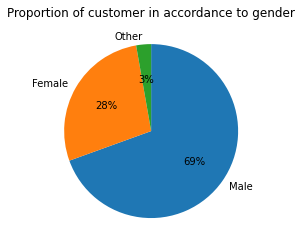

In [38]:
# Relation of Customer and gender
print(fordgobike_clean['user_type'].value_counts().Customer)
customer_gender=customer['member_gender'].value_counts()
plt.title('Proportion of customer in accordance to gender')
pie, rtf = pie_plot(customer_gender)
rtf 

> The male also dominate followed by female and the others make the least number.

**Is there any relation of the member gender in accordance to the age of the member?**

member_gender
member_age_groups member_gender               
Teen              Male                   83053
                  Female                 28369
                  Other                   2013
Adult             Male                   43828
                  Female                 11650
                  Other                   1527
Old               Male                    2963
                  Female                   494
                  Other                     50

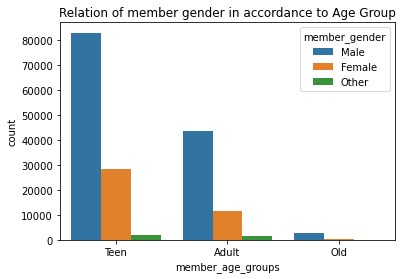

In [39]:
# visualizing
plt.title('Relation of member gender in accordance to Age Group' )
countplot, rtf = count_plot('member_gender')
rtf

> For all the age groups, the male gender dominate in numbers as compared to the other genders with most of the male gender high in numbers for the teen age group followed by adult and lastly the old. Female gender falls in as second for all the age groups while the others make up the least.

member_gender
user_type  member_gender               
Customer   Male                   11129
           Female                  4447
           Other                    443
Subscriber Male                  118715
           Female                 36066
           Other                   3147

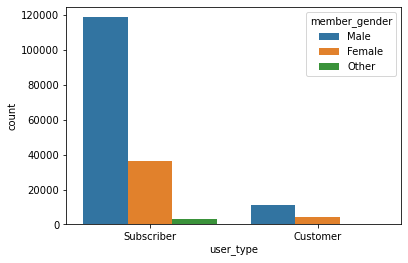

In [40]:
sb.countplot(data = fordgobike_clean, x = 'user_type', hue='member_gender')
pd.DataFrame(fordgobike_clean.groupby('user_type')['member_gender'].value_counts())

> Most of the subscribers are male followed by female while the others make up the least number of subscribers.<br>
>This is the same for the customer

## Multivariate Exploration

**What is the relationship of the old subscribers and customers who don't share their bike for the trip**

In [41]:
No_share=fordgobike_clean.query('bike_share == 0')
share=fordgobike_clean.query('bike_share == 1')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


(60.0, 142.0)

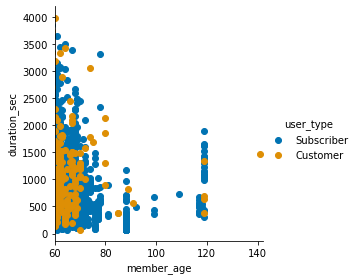

In [42]:
g = sb.FacetGrid(data = No_share, hue = 'user_type',size=4,
                 palette = 'colorblind')
g.map(plt.scatter, 'member_age', 'duration_sec')
g.add_legend()
plt.xlim([60.0, 142.0])

> For the old, most of the member who didn't share the bike for the trip are between the age of 60 to 80.<br>
> Most of them take a duration time of 18 to 2000 <br>
> They are mostly composed of subscribers as expected and less customers.
> Mostly, both Customers and subscribers share the same position; in the age range of 60 to 80 and time duration of 18 to 2000

**what is the relationship of subscribers with members gender and the bike share for the trip**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


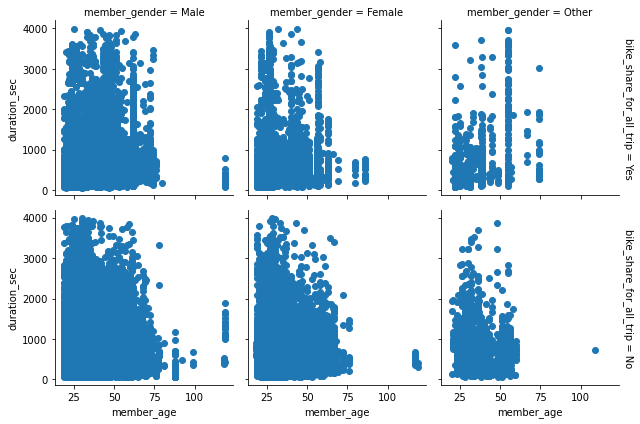

In [43]:
g = sb.FacetGrid(data = subscriber , col = 'member_gender', row = 'bike_share_for_all_trip', size = 3,
                margin_titles = True)
g.map(plt.scatter, 'member_age', 'duration_sec')

> The males mostly have a age range of 18 to 75. Most of them who share their bike for the trip have a duration time of 2000 and below, while those who don't share the bike has a higher duration time of 3000 and below. Most of the male gender don't share the bike.<br>
> The female in other hand have a age range of 18 to 75 but this is more dominant for those who don't share their bike as compared to those that share.Those who don't share their bike for the trip are also observed to have a higher duration time of about 2500 as compared to 1500 for those who share the bike. Most famale don't share their bikes also.<br>
> For the others, most of them are between the age of 18 to 60. Those who don't share their bike are also the greatest in number. Those who share their bike take a less duration time compared to those who don't.

**what is the relationship of customer with members gender and the bike share for the trip**

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


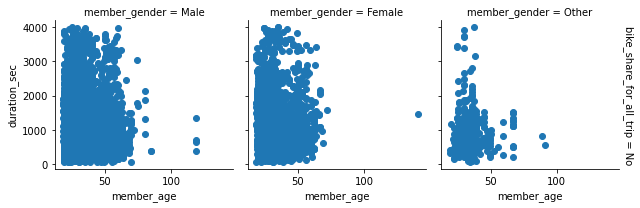

In [44]:
g = sb.FacetGrid(data = customer , col = 'member_gender', row = 'bike_share_for_all_trip', size = 3,
                margin_titles = True)
g.map(plt.scatter, 'member_age', 'duration_sec')

> All of the customer don't share their bike for the trip. The male and the female genders are the dominant with most of them in the age range of 18 to 75. The male take a more duration time compared to the rest of the genders followed by the female and lsalty the others. Most of the others are between a age range of 18 to 50 taking less duration time for the trip.

**Were there any interesting or surprising interactions between features?**
> There are no customer who share their bike for the trip 

## Conclusions
The data analysied consist of 183412 members of the service for month of February of 2019 in in a bike-sharing system covering the greater San Francisco Bay area. Out of the total number, 8,265 bikers were dropped due to missing member_birth_year and member_gender. Also, for this date analysis, only duration time of 61 to 4,000 was dealt with thus, leaving the data to consist of 173,947 bikers. This analysis is mostly interested in figuring out what features have a relationship to the period the trip takes. It is expected that duration will have a relationship with the member_gender, user_type, member_birth_year and bike_share_for_all_trip.<br>
Duration had a long-tailed distribution, with a lot of bikers on taking on the low duration end and few on the high duration end. When plotted on a log-scale, the duration distribution is bimodal, with the highest peak between 400 and 800. Most of the members are between the age of 20 and 40 years. Most of the bikers in the dataset are subscribers (91%) while only 9% are customer. Males are the dominant gender in the dataset followed by female while the others male uo the least number of biker.There was no much bike share through the trip. The data was grouped in terms of ages; Old,Adult, Teen to help ease up visualization. With most of the members between the age of 25 to 50, it is expected that most of the members are teen followed by adults and the old make up the least number of members.<br>
For the distribution of the duration in terms of the age groups show that majority of the population didn't have a high duration time; mostly on the 500 to 1000 sec. Those with high duration time can be termed as Young population. The old take the lowest duration time but also there are few old members in the data. This is the same case for bike share for the trip where Teen age member don't share the bike the most followed by adult then the old. However, in terms of proportion to the total number of age groups, most of the old age members share the bike during the trip followed by the teen and lastly the adult members. This is the reverse for members who don't share the bike with adults not sharing the biker for the trip followed by teen, while the old share don't share the bike the least.<br>
Most of all the age groups are subscribers while a few are customer,with teen having the highest number of customers and subscribers followed by adult and the old lastly. Out of the 157,928 subscribers , 11% share bike while 89% don't share bikes. However, 100% of the customer don't share the bike for all trip. The male gender dominate for the subscribers followed by female while the others make the least percent which is the same for customers. This in mostly as a results of having  the male gender high numbers as compared to the other genders with most of the male gender high in numbers for the teen age group followed by adult and lastly the old. Female gender falls in as second for all the age groups while the others make up the least. Also, Most of the subscribers are male followed by female while the others make up the least number of subscribers.<br>
As observed earlier, the old have the least number of members who didn't share the bike for the trip. Most of this members are between the age of 60 to 80 with a duration time of between 18 to 2000 sec. They are mostly composed of subscribers as expected and less customers with both Customers and subscribers mostly sharing the same position; in the age range of 60 to 80 and time duration of 18 to 2000.<br>
Most of the males have a age range of 18 to 75 with most of them who share their bike for the trip have a duration time of 2000 and below, while those who don't share the bike has a higher duration time of 3000 and below. Most of them don't share the bike.<br>
The female in other hand have a age range of 18 to 75 but this is more dominant for those who don't share their bike as compared to those that share.Those who don't share their bike for the trip are also observed to have a higher duration time of about 2500 as compared to 1500 for those who share the bike. Most famale don't share their bikes also. For the others, most of them are between the age of 18 to 60. Those who don't share their bike are also the greatest in number. Those who share their bike take a less duration time compared to those who don't.<br>
With the customer not sharing their bike for the trip the male and the female genders are the dominant with most of them in the age range of 18 to 75. The male take a more duration time compared to the rest of the genders followed by the female and lasalty the others. Most of the others are between a age range of 18 to 50 taking less duration time for the trip.